<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **04. 사이킷런  LinearRegression을 이용한 보스턴 주택 가격 예측**
  - `linear_models` 모듈 : 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다.
  - `LinearRegression` : 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스
  - LinearRegression을 이용해 보스턴 주택 가격 예측 회귀를 구현해보자.

#### **a. LinearRegression 클래스 - Ordinary Least Squares**
  - `LinearRegression` : 예측값과 실제값의 `RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현`한 클래스
  - `LinearRegression` 클래스는 `fit()` 메서드로 X, y 배열을 입력 받으면 `회귀 계수인 W를 coef_ 속성에 저장`
    - 입력 파라미터
      - `fit_intercept` : 불린 값으로, 디폴트는 True. Intercept 값을 계산할 것인지 말지를 지정. 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정.
      - `normalize` : 불린 값으로, 디폴트는 False. fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True이면 회귀를 수행하기 전 입력 데이터 세트를 정규화.
    - 속성
      - coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수).
      - intercept_ : intercept 값.
  - 피처 간의 `상관관계가 매우 높은` 경우 `분산이 매우 커져서` 오류에 매우 민감해지는데, 이를 `다중공선성(multi-colinearity)` 문제라고 한다.
  - 따라서 상관관계가 높은 피처가 많은 경우 `중요한 피처만 남기고 제거`하거나, `규제를 적용`한다. 또한 `PCA를 통해 차원 축소`를 수행하기도 한다.


#### **b. 회귀 평가 지표**
  - 회귀 성능 평가 지표
    
    
    - MAE(Mean Absolute Error)
      - 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것

$$MAE = \frac {1}{n} ∑_{i=1}^n |y_{i} - ŷ_{i}|$$

    - MSE(Mean Squared Error)
      - 실제값과 예측값의 차이를 제곱해 평균한 것

$$MSE = \frac {1}{n} ∑_{i=1}^n (y_{i} - ŷ_{i})^2$$

    - RMSE(Root Mean Squared Error)
      - MSE가 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는데, 이를 막기 위해 루트를 씌운 것

$$RMSE = \sqrt {\frac {1}{n} ∑_{i=1}^n (y_{i} - ŷ_{i})^2}$$

    - R-squared
      - 분산 기반으로 예측 성능을 평가
      - 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

$$R^2 = \frac{예측값 Variance} {실제값 Variance}$$

  - 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터
    - MAE 
      - 사이킷런 API : metrics.mean_absolute_error
      - Scoring 함수 적용 값 : '`neg_`mean_absolute_error'
    - MSE
      - 사이킷런 API : metrics.mean_squared_error
      - Scoring 함수 적용 값 : '`neg_`mean_squared_error'
    - R-squared
      - 사이킷런 API : metrics.r2_score
      - Scoring 함수 적용 값 : 'r2'

    - Scoring 함수에서 `음수값을 반환`하는 이유는, 사이킷런의 `scoring 함수`가 score `값이 클수록 좋은 평가 결과로 평가`하기 때문이다. 실제값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우, 값이 커지면 오히려 나쁜 모델이므로 일반적으로 반영하려면 보정이 필요하다. 따라서 `원래의 평가 지표 값에 음수를 곱해 작은 오류 값이 더 큰 숫자로 인식`되도록 한다. 

#### **c. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**
  
    - CRIM : 지역별 범죄 발생률
    - ZN : 25000평방비트를 초과하는 거주 지역의 비율
    - INDUS : 비상업 지역 넓이 비율
    - CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
    - NOX : 일산화질소 농도
    - RM : 거주할 수 있는 방 개수
    - AGE : 1940년 이전에 건축된 소유 주택의 비율
    - DIS : 5개 주요 고용센터까지의 가중 거리
    - RAD : 고속도로 접근 용이도
    - TAX : 10000달러 당 재산세율
    - PTRATIO : 지역의 교사와 학생 수 비율
    - B : 지역의 흑인 거주 비율
    - LSTAT : 하위 계층의 비율
    - MEDV : 본인 소유의 주택 가격(중앙값)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋을 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target 배열은 주택 가격
# 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터 셋 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 셋 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


  - 데이터 세트 피처의 Null 값은 없으며, 모두 float형이다.

> 다음으로 각 칼럼이 회귀 결과에 미치는 영향을 확인해보자.
  - seaborn의 `regplot()` : X, Y축 값의 `산점도와 선형 회귀 직선`을 함께 그려주는 함수

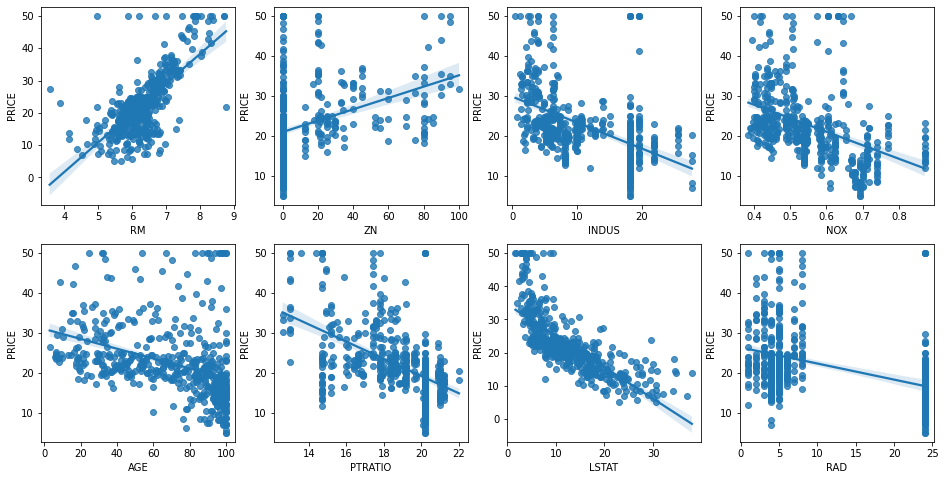

In [2]:
# 2개의 행과 4개의 열을 가진 subplots를 이용
# axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

  - 다른 칼럼보다 `RM`과 `LSTAT`의 PRICE 영향도가 가장 두드러진다. 
    - `RM(방 개수)은 양 방향의 선형성`이 가장 크다. 즉, `방의 크기가 클수록 가격이 증가`하는 모습을 보인다.
    - `LSTAT(하위 계층의 비율)은 음 방향의 선형성`이 가장 크다. `LSTAT이 적을수록 PRICE가 증가`하는 모습이 나타난다.

> 이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들어보자. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


> LinearRegression으로 생성한 주택가격 모델의 intercept와 coefficients 값을 확인해보자.

In [5]:
print('절편 값:', lr.intercept_)
print('회귀계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


> coef_ 속성은 회귀 계수 값만 가지고 있으므로, 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해보자.

In [7]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

  - RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수는 - 값이 너무 커보인다.

> 이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보자. 

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5개의 폴드 세트로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
# 음수 값이므로 -1을 곱하여 계산
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


  - 5개의 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.829가 나왔다. cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값을 확인해보면 모두 음수임을 알 수 있다. 